# Sentiment Analysis with TWEEPY

## Modules required
* Tweepy
* TextBlob

In [23]:
import sys, tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
import json

In [24]:
# Credentials 
json_file = '/Users/pruthvivikram/Documents/GitHub/keys.json'

try:
    open(json_file, 'r')
    # Read json file and load key for twitter
    with open(json_file, 'r') as f:
        auth_data = json.load(f)
    # Twitter Credentials
    CONSUMER_KEY = auth_data['twitter']['CONSUMER_KEY']
    CONSUMER_SECRET = auth_data['twitter']['CONSUMER_SECRET']
    ACCESS_KEY = auth_data['twitter']['ACCESS_KEY']
    ACCESS_SECRET = auth_data['twitter']['ACCESS_SECRET']
except:
    print("Developer not allowing to use his credentials.\n Please goto developer.twitter.com and\
    create an application.\n And setup below variables\n\
    1. CONSUMER_KEY = \"\"\n\
    2. CONSUMER_SECRET = \"\"\n\
    3. ACCESS_KEY = \"\"\n\
    4. ACCESS_SECRET = \"\"\n\
          ")

In [25]:
# API Authentication
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)

In [26]:
TERM = 'pubg'
num = 200

In [27]:
def percentage_calc(per, whole):
    return 100 * float(per)/float(whole)

In [28]:
positive = 0.0
negative = 0.0
neutral = 0.0
polarity = 0.0

tweets = tweepy.Cursor(api.search,q=TERM,lang="en").items(num)

for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if analysis.sentiment.polarity == 0:
        neutral += 1
    elif analysis.sentiment.polarity < 0:
        negative += 1
    elif analysis.sentiment.polarity > 0:
        positive += 1

positivep = percentage_calc(positive, num)
negativep = percentage_calc(negative, num)
neutralp = percentage_calc(neutral, num)

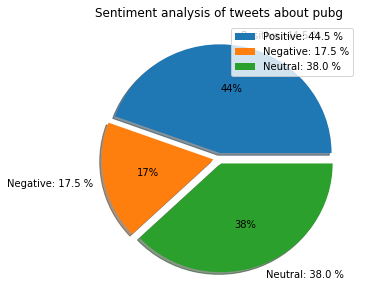

In [29]:
# Pie chart
fig = plt.figure(figsize=[5, 5])
labels=["Positive: "+str(positivep)+" %",
        "Negative: "+str(negativep)+" %",
        "Neutral: "+str(neutralp)+" %",]
plt.pie((positive, negative, neutral), labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0.05, 0.05, 0.05))
plt.title('Sentiment analysis of tweets about '+ TERM)
plt.legend()
plt.show()